In [1]:
x = 0.0                     #ロボットの位置
x_max = 3.0                 #環境の広さ（1次元なので長さ）
cell_num = 30                       #確率の計算をするための離散区間の数
probs = [1.0/cell_num] * cell_num   #確率を入れるリスト
landmarks = [0.5, 2.0]              #ランドマークの位置

In [2]:
from matplotlib import pyplot as plt   #グラフ描画用モジュールの読み込み

def draw():
    plt.xlabel("X", fontsize=10)   #横軸のラベル
    plt.ylabel("P", fontsize=10)   #縦軸のラベル

    # 確率の描画
    cell_centers = [x_max/cell_num*(i+0.5) for i in range(cell_num)] #各区間の中央を計算
    plt.bar(cell_centers, probs, width=x_max/cell_num, alpha=0.5)    #棒グラフを描画
    # ロボットの描画
    plt.scatter([x], [0.1], s=100, marker="o", fc="red")    #頭の円の描画
    plt.plot([x,x],[0,0.1], color="red")                    #体の棒の描画
    # ランドマークの描画
    plt.scatter([landmarks], [0.9]*len(landmarks), s=200, marker="*", fc="orange") #星の描画

    plt.show()

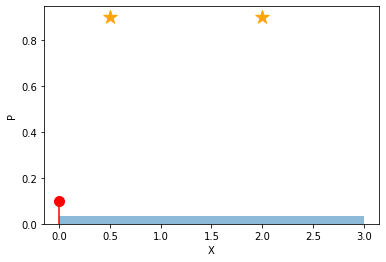

In [3]:
draw()

In [4]:
import random

def robot_motion(x, action):
    delta = 0.1 + random.uniform(-0.02, 0.02)
    new_x = x + delta if action == "right" else x - delta
    ### Xの範囲からはみ出た場合は戻す ###
    return min(max(0.0, new_x), x_max - 0.0001)

def prob_motion(probs, action):
    new_probs = {i:0.0 for i in range(-2,cell_num+2)}
    delta = 1 if action == "right" else -1
    for i, p in enumerate(probs):
        new_probs[i+delta-1] += p/12
        new_probs[i+delta] += p*10/12
        new_probs[i+delta+1] += p/12
    ### Xの範囲からはみ出た確率を端のセルの確率に足す ###
    new_probs[cell_num-1] += new_probs[cell_num] + new_probs[cell_num+1]
    new_probs[0] += new_probs[-1] + new_probs[-2]
        
    return [new_probs[p] for p in range(cell_num)]

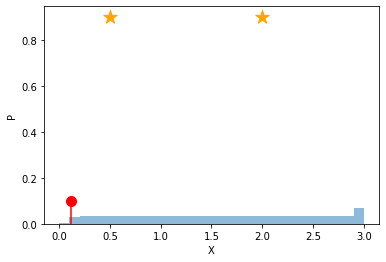

In [5]:
def one_step(action):
    global x, probs
    x = robot_motion(x, action)
    probs = prob_motion(probs, action)

### ロボットを右に1ステップ動かしてみましょう ###
one_step("right")
draw()

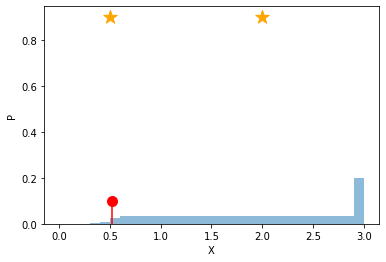

In [6]:
### さらに4ステップ動かしてみる ###
for i in range(4):
    one_step("right")
    
draw()

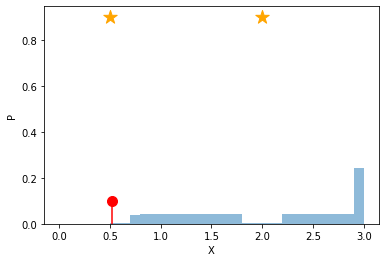

In [7]:
def observation(x):
    ### xがランドマークの下かという条件と、10%の確率でTrueになる条件のXORを返す ###
    return (0.3 < x < 0.7 or 1.8 < x < 2.2) ^ (random.random() < 0.1)

def prob_obs(probs, obs):
    for i, p in enumerate(probs):
        ### ベイズの定理の分子の計算。前半の括弧がP(z|i)、pがP(i)に相当 ###
        probs[i] = (0.1 if (i in [3,4,5,6,18,19,20,21]) ^ obs else 0.9) * p
        
    return [p / sum(probs) for p in probs] #確率分布の合計が1になるように正規化（分母の計算）

### 観測を1回実行してみましょう ###
obs = observation(x)
probs = prob_obs(probs, obs)
draw()

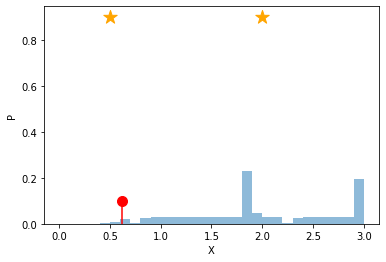

In [8]:
def one_step(action):
    global x, probs
    x = robot_motion(x, action)
    probs = prob_motion(probs, action)
    obs = observation(x)
    probs = prob_obs(probs, obs)

### ロボットを右に1ステップ動かしてみましょう ###
one_step("right")
draw()

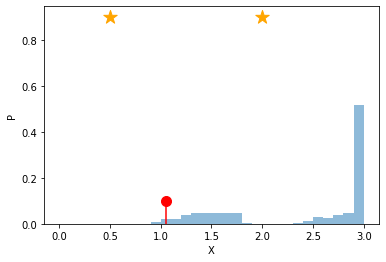

In [9]:
for i in range(4):
    one_step("right")
    
draw()

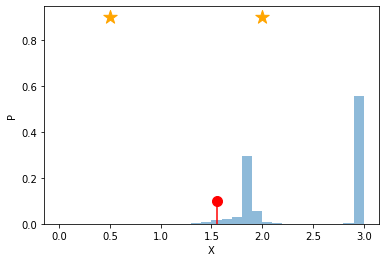

In [10]:
for i in range(5):
    one_step("right")
    
draw()

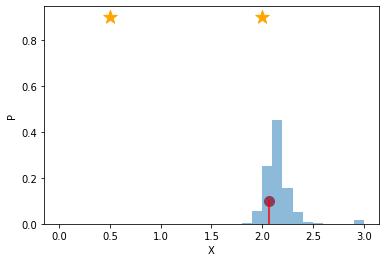

In [11]:
for i in range(5):
    one_step("right")
    
draw()